<a href="https://colab.research.google.com/github/alexbonella/Tensorflow2/blob/master/Tiger_detection_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisar el siguiente repo de tensorflow

* https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import cv2
import os
from tqdm import tqdm



print(tf.__version__)

1.15.0


# Clonamos repositorio 

In [3]:
#! git clone https://github.com/puigalex/deteccion_objetos.git

fatal: destination path 'deteccion_objetos' already exists and is not an empty directory.


In [0]:
import os 

In [5]:
os.listdir('deteccion_objetos')

['TFRecords',
 'csv_a_tf.py',
 'setup.py',
 'img_entrenamiento',
 'img_pruebas',
 'xml_a_csv.py',
 'modelo',
 'slim',
 'object_detection',
 '.git',
 'configuracion',
 'img_test',
 'CSV',
 'images',
 'output']

# Cambiamos nuestro directorio

In [0]:
os.chdir('deteccion_objetos')

In [0]:
# Instalamos los siguientes paquetes 

!python setup.py build
!python setup.py install

# Establecemos variables de entorno

In [0]:
os.environ['PYTHONPATH'] += ':/content/deteccion_objetos:/content/deteccion_objetos/slim/'

In [0]:
#! export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

# cambiamos de directorio para ejecutar los siguientes comandos : 

* ! python xml_a_csv.py --inputs=img_test --output=test

* ! python xml_a_csv.py --inputs=img_entrenamiento --output=entrenamiento

* ! python csv_a_tf.py --csv_input=CSV/test.csv --output_path=TFRecords/test.record --images=images

* ! python csv_a_tf.py --csv_input=CSV/entrenamiento.csv --output_path=TFRecords/entrenamiento.record --images=images

# Creamos 2 nuevas carpetas 

In [0]:
#os.mkdir('CSV')
#os.mkdir('TFRecords')

In [10]:
!ls

configuracion  images		  img_test	    output    TFRecords
CSV	       img_entrenamiento  modelo	    setup.py  xml_a_csv.py
csv_a_tf.py    img_pruebas	  object_detection  slim


In [11]:
 ! python xml_a_csv.py --inputs=img_test --output=test

Se han generado los CSVs


In [12]:
! python xml_a_csv.py --inputs=img_entrenamiento --output=entrenamiento

Se han generado los CSVs


# Conversion de CSV en TFRecords

Tener en cuenta que para hacer la conversion de CSV a TFRecords debe usarse la version TF 1.15

In [0]:
#! python csv_a_tf.py --csv_input=CSV/test.csv --output_path=TFRecords/test.record --images=images

In [0]:
#! python csv_a_tf.py --csv_input=CSV/entrenamiento.csv --output_path=TFRecords/entrenamiento.record --images=images

In [17]:
# tamaño de los objetos 
 !du -sh *

12K	configuracion
40K	CSV
4.0K	csv_a_tf.py
107M	images
77M	img_entrenamiento
76K	img_pruebas
31M	img_test
248M	modelo
4.9M	object_detection
1.1M	output
4.0K	setup.py
2.2M	slim
98M	TFRecords
4.0K	xml_a_csv.py


# Entrenamiento del modelo 

In [27]:
! python object_detection/train.py --logtostderr --train_dir=train --pipeline_config_path=modelo/faster_rcnn_resnet101_coco.config

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W0317 15:17:34.059290 139649212876672 module_wrapper.py:139] From object_detection/train.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

INFO:tensorflow:Scale of 0 disables regularizer.
I0317 15:17:34.075514 139649212876672 regularizers.py:98] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0317 15:17:34.075898 139649212876672 regularizers.py:98] Scale of 0 disables regularizer.
Instructions for updating:
Please switch to tf.train.create_global_step
W0317 15:17:34.077485 139649212876672 deprecation.py:323] From /content/deteccion_objetos/object_detectio

# Congelamos nuestro modelo entrenado

Revisar nuestra carpeta **`train`** en el cual tenemos nuestros checkpoint generados por el entrenamiento de nuestro modelo. 

Para poder usar nuestro modelo solo debemos correr un comando en donde debemos cambiar  model.ckpt-**`684`** por el ultimo checkpoint que hayamos generado en nuestro entrenamiento . 

En este caso particular nuestro ultimo checkpoint fue ***1462*** 

In [28]:
! python object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path modelo/faster_rcnn_resnet101_coco.config  --trained_checkpoint_prefix train/model.ckpt-1462 --output_directory modelo_congelado

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0317 15:42:24.996908 140446786324352 module_wrapper.py:139] From object_detection/export_inference_graph.py:98: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

INFO:tensorflow:Scale of 0 disables regularizer.
I0317 15:42:25.003278 140446786324352 regularizers.py:98] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0317 15:42:25.003651 140446786324352 regularizers.py:98] Scale of 0 disables regularizer.

W0317 15:42:25.084648 140446786324352 module_wrapper.py:139] From /content/deteccion_objetos/object_detection/exporter.py:307: The name tf.gfile.MakeDirs is depre

# Modelo para predicciones 

Lo que hicimos en nuestro paso anterior fue tomar nuestro ultimo checkpoint y congelar nuestro modelo para poder ser usado en predicciones , para encontrar nuestro modelo resumido nos dirijimos a la siguiente ruta : 

* `/content/deteccion_objetos/modelo_congelado/frozen_inference_graph.pb`



# Prediccion de nuestro modelo

Ejecuatamos el siguiente comando 

In [72]:
%%time
! python object_detection/object_detection_runner.py


['img_pruebas/images (2).jpeg', 'img_pruebas/images.jpeg', 'img_pruebas/download (1).jpeg', 'img_pruebas/download.jpeg', 'img_pruebas/images (1).jpeg']
Loading model...

detecting...

2020-03-17 16:19:48.594647: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-03-17 16:19:48.616697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-17 16:19:48.617537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-03-17 16:19:48.617841: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-03-17 16:19:48.620035: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully

# Visualizamos nuestras predicciones 

In [0]:
imagenes=[]
for i in os.listdir('img_pruebas'):
  imagenes.append(cv2.imread('img_pruebas/'+str(i)))

# Imagenes de prueba 

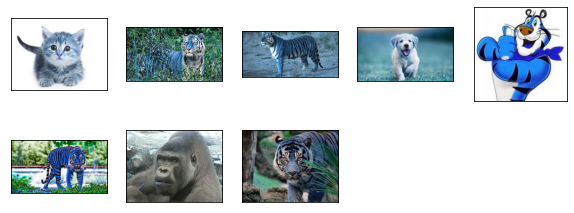

In [74]:

plt.figure(figsize=(10,10))
for i in range(len(imagenes)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_tag[454+i]])
plt.show()

# Predicciones

In [0]:
imgs=[]
for i in os.listdir('output/img_pruebas'):
  imgs.append(cv2.imread('output/img_pruebas/'+str(i)))

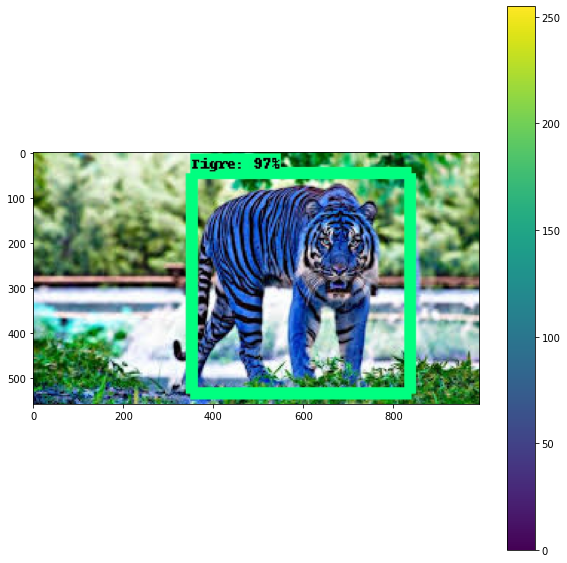

In [83]:
plt.figure(figsize=(10,10))
plt.imshow(imgs[3])
plt.colorbar()
plt.grid(False)